**Data Collection using yfinance**

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = yf.download("^BSESN", start="2004-01-01", end="2025-06-06")
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
print(df.shape)

(5270, 5)


In [4]:
print(df.tail())

Price              Close          High           Low          Open  Volume
Date                                                                      
2025-05-30  81451.007812  81698.210938  81286.453125  81465.687500   12600
2025-06-02  81373.750000  81474.257812  80654.257812  81214.421875    9900
2025-06-03  80737.507812  81774.226562  80575.093750  81492.500000   32000
2025-06-04  80998.250000  81087.289062  80705.179688  80777.648438    7500
2025-06-05  81442.039062  81911.132812  80983.726562  81196.078125    9800


In [5]:
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2004-01-02,6026.589844,6034.379883,5944.229980,5944.229980,31400
2004-01-05,6039.000000,6078.109863,5964.649902,6050.479980,33600
2004-01-06,5943.640137,6121.200195,5916.330078,6068.680176,37600
2004-01-07,5957.020020,5985.299805,5870.549805,5970.350098,36200
2004-01-08,6108.540039,6118.620117,5992.100098,5992.100098,31600
...,...,...,...,...,...
2025-05-30,81451.007812,81698.210938,81286.453125,81465.687500,12600
2025-06-02,81373.750000,81474.257812,80654.257812,81214.421875,9900
2025-06-03,80737.507812,81774.226562,80575.093750,81492.500000,32000


In [6]:
print(df.head(10))

Price             Close         High          Low         Open  Volume
Date                                                                  
2004-01-02  6026.589844  6034.379883  5944.229980  5944.229980   31400
2004-01-05  6039.000000  6078.109863  5964.649902  6050.479980   33600
2004-01-06  5943.640137  6121.200195  5916.330078  6068.680176   37600
2004-01-07  5957.020020  5985.299805  5870.549805  5970.350098   36200
2004-01-08  6108.540039  6118.620117  5992.100098  5992.100098   31600
2004-01-09  6119.589844  6249.600098  6096.680176  6241.589844   45200
2004-01-12  6067.759766  6152.220215  6037.299805  6152.220215   31600
2004-01-13  6132.970215  6147.740234  6011.569824  6084.649902   33200
2004-01-14  6194.109863  6215.020020  6162.180176  6162.180176   35600
2004-01-15  6063.910156  6248.810059  6045.299805  6219.810059   38000


In [7]:
print(df.isnull().sum())

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [8]:
print(df.columns.tolist())


['Close', 'High', 'Low', 'Open', 'Volume']


**Data** **Visualization**

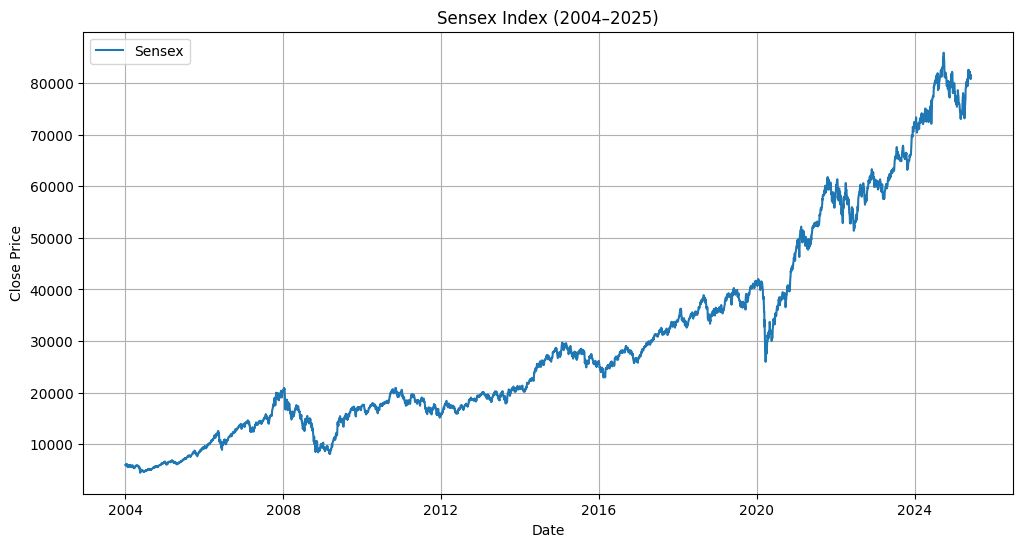

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Sensex')
plt.title('Sensex Index (2004–2025)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.legend()
plt.show()

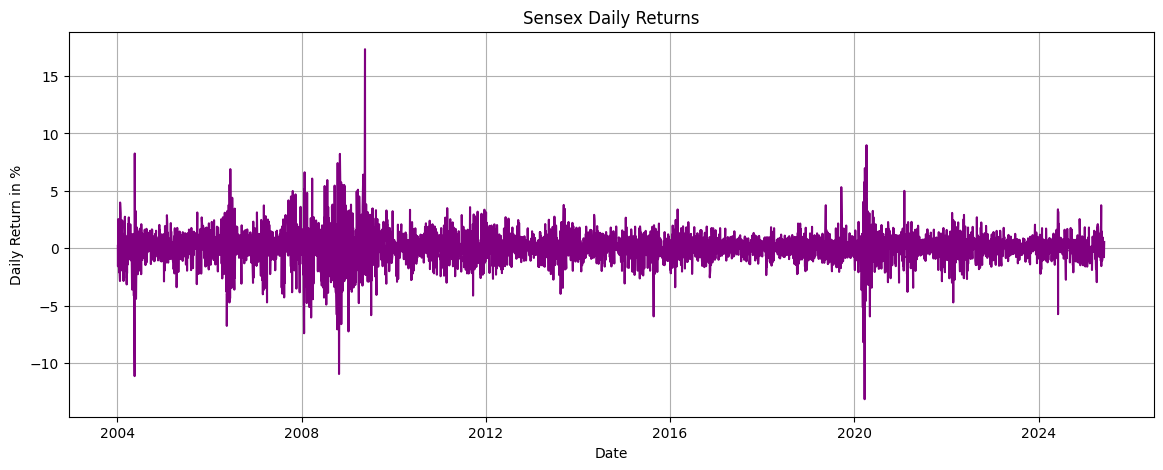

In [10]:
df['Daily_return'] = df['Close'].pct_change() * 100

plt.figure(figsize=(14,5))
plt.plot(df['Daily_return'], color='purple')
plt.title('Sensex Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return in %')
plt.grid(True)
plt.show()


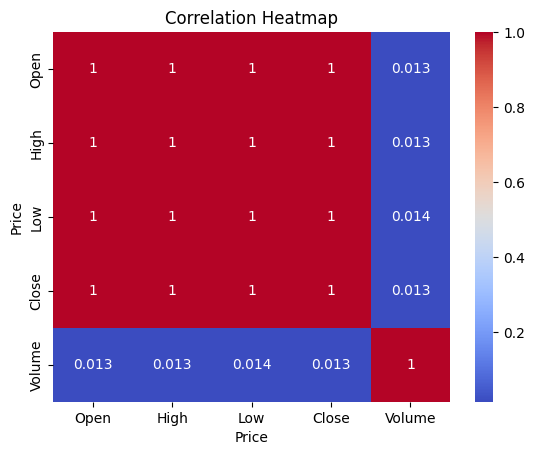

In [11]:
import seaborn as sns
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5270 entries, 2004-01-02 to 2025-06-05
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         5270 non-null   float64
 1   High          5270 non-null   float64
 2   Low           5270 non-null   float64
 3   Open          5270 non-null   float64
 4   Volume        5270 non-null   int64  
 5   Daily_return  5269 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 288.2 KB
None


In [13]:
print(df.describe())

Price         Close          High           Low          Open        Volume  \
count   5270.000000   5270.000000   5270.000000   5270.000000  5.270000e+03   
mean   30228.744269  30416.567445  30041.224474  30253.366324  7.665909e+04   
std    20206.258475  20289.562740  20118.465291  20214.880524  1.031088e+06   
min     4505.160156   4717.740234   4227.500000   4547.700195  0.000000e+00   
25%    16169.312500  16310.829834  16032.319580  16210.280029  9.600000e+03   
50%    25081.294922  25282.945312  24983.299805  25134.395508  1.360000e+04   
75%    38722.339844  38978.871094  38556.769531  38815.286133  1.980000e+04   
max    85836.117188  85978.250000  85474.578125  85893.843750  3.181510e+07   

Price  Daily_return  
count   5269.000000  
mean       0.058557  
std        1.350427  
min      -13.152580  
25%       -0.544457  
50%        0.079041  
75%        0.709954  
max       17.339335  


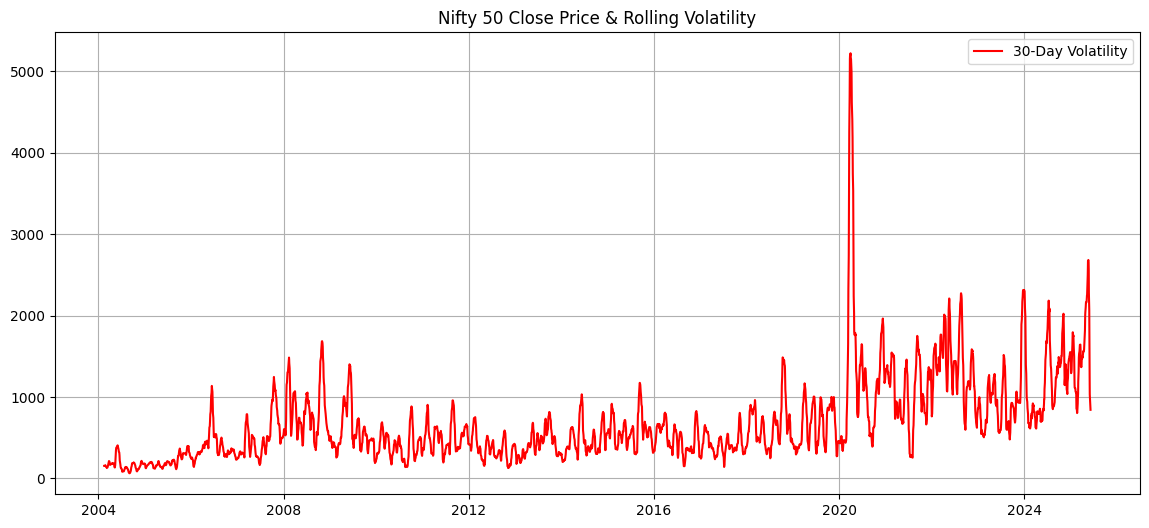

In [14]:
# Checking Volatility of NIFTY 50 for a month
df['Volatility'] = df['Close'].rolling(window=30).std()
plt.figure(figsize=(14,6))
plt.plot(df['Volatility'], label='30-Day Volatility', color='red')
plt.title('Nifty 50 Close Price & Rolling Volatility')
plt.legend()
plt.grid()
plt.show()

In [15]:
df.head()

Price,Close,High,Low,Open,Volume,Daily_return,Volatility
Date,,,,,,,
2004-01-02,6026.589844,6034.379883,5944.229980,5944.229980,31400,NaN,NaN
2004-01-05,6039.000000,6078.109863,5964.649902,6050.479980,33600,0.205923,NaN
2004-01-06,5943.640137,6121.200195,5916.330078,6068.680176,37600,-1.579067,NaN
2004-01-07,5957.020020,5985.299805,5870.549805,5970.350098,36200,0.225113,NaN
2004-01-08,6108.540039,6118.620117,5992.100098,5992.100098,31600,2.543554,NaN


In [16]:
df['MA_300'] = df['Close'].rolling(window=300).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()
df['MA_100'] = df['Close'].rolling(window=100).mean()

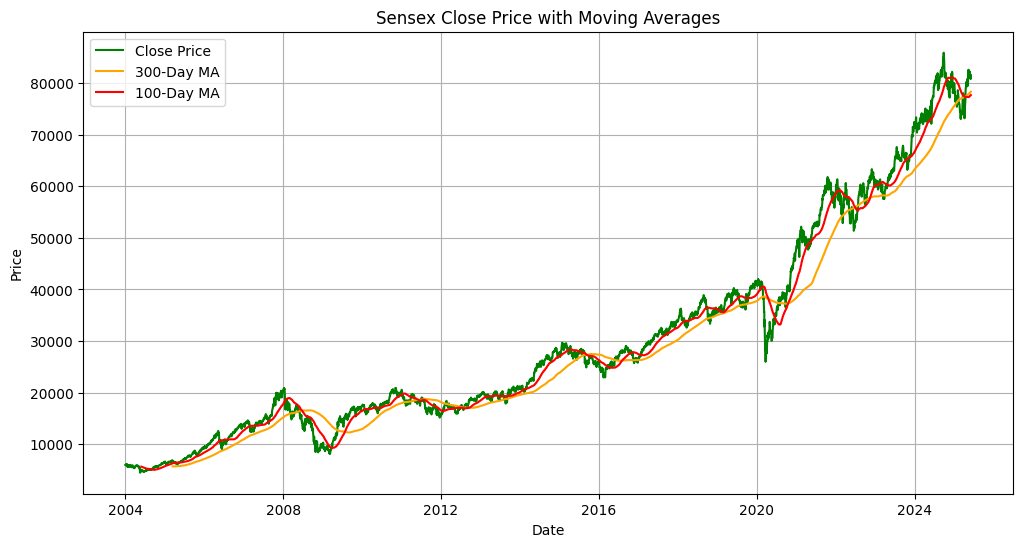

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='green')
plt.plot(df['MA_300'], label='300-Day MA', color='orange')
plt.plot(df['MA_100'], label='100-Day MA', color='red')
plt.title('Sensex Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
df[['Close','Daily_return']].head(10)

Price,Close,Daily_return
Date,,
2004-01-02,6026.589844,NaN
2004-01-05,6039.000000,0.205923
2004-01-06,5943.640137,-1.579067
2004-01-07,5957.020020,0.225113
2004-01-08,6108.540039,2.543554
2004-01-09,6119.589844,0.180891
2004-01-12,6067.759766,-0.846953
2004-01-13,6132.970215,1.074704
2004-01-14,6194.109863,0.996901


In [19]:
close_price = df[["Close"]]
print(max(close_price.values),min(close_price.values))

[85836.1171875] [4505.16015625]


In [20]:
# ADF test for checking whether the data is stationary or not.
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 1.3246570892138672
p-value: 0.996743486586772


In [21]:
df['Close_diff'] = df['Close'].diff()


In [22]:
result = adfuller(df['Close_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# now p<0.5 mean we can apply ARIMA on our stationary data

ADF Statistic: -12.804594268114126
p-value: 6.642360597809253e-24


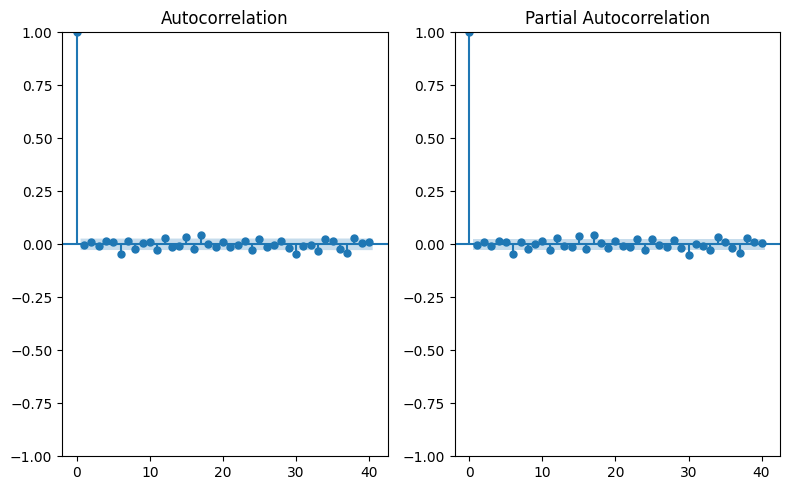

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.subplot(121)
plot_acf(df['Close_diff'].dropna(), ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(df['Close_diff'].dropna(), ax=plt.gca(), lags=40)
plt.tight_layout()
plt.show()


Train size: 4216, Test size: 1054


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

RMSE: 12124.750430760983
MAE: 9965.742689733313


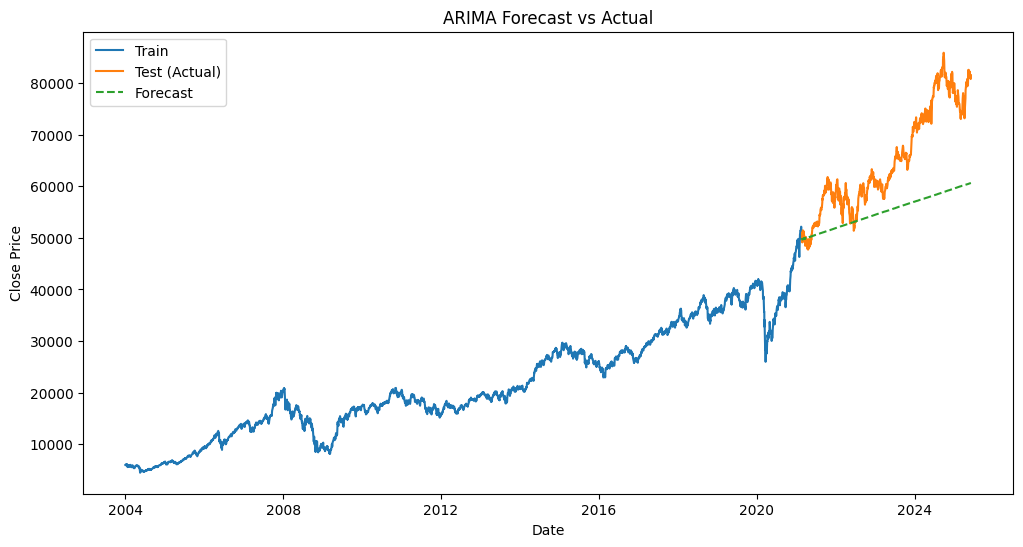

In [24]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 80% train, 20% test
split_index = int(len(df) * 0.8)
train = df['Close'][:split_index]
test = df['Close'][split_index:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

p, d, q = 2, 1, 2
model = ARIMA(train, order=(p, d, q), trend='t')
model_fit = model.fit()

#Forecast for length of test set
forecast = model_fit.forecast(steps=len(test))

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test (Actual)')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/stat

RMSE: 3517.3359695876093
MAE: 2769.6438801416707


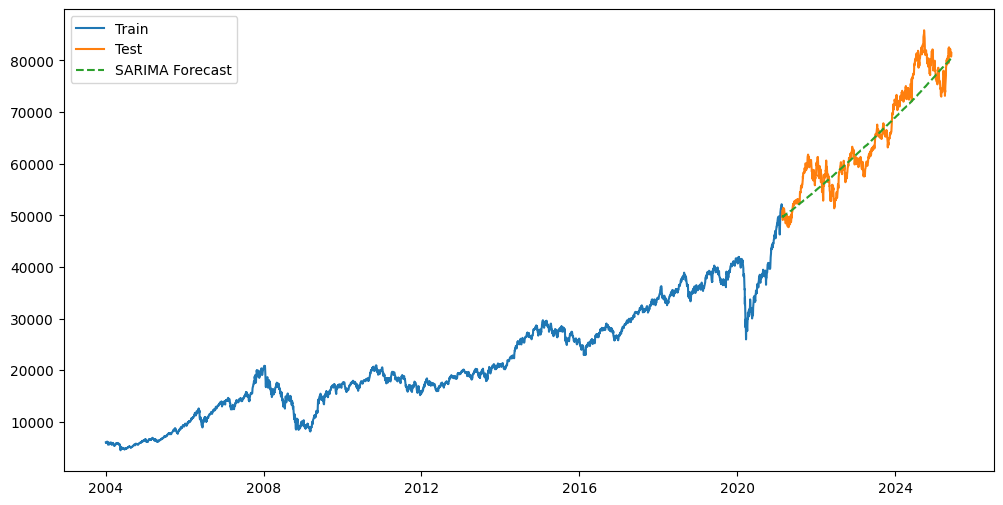

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

p, d, q = 2, 1, 2         # non-seasonal order
P, D, Q, m = 2, 1, 2, 7   # seasonal order

model = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,m), trend='t')
model_fit = model.fit(disp=False)

forecast = model_fit.forecast(steps=len(test))

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='SARIMA Forecast', linestyle='--')
plt.legend()
plt.show()


## **SARIMA is performing better than ARIMA **

In [26]:
# Using LSTM now
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

Scaler = MinMaxScaler()
Scaled_data = Scaler.fit_transform(df[['Close']])

In [27]:
def sequences(data,window):
  X,y = [],[]
  for i in range(window,len(data)):
    X.append(data[i-window:i])
    y.append(data[i])
  return np.array(X),np.array(y)
window_size = 60
X,y = sequences(Scaled_data,window_size)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - loss: 0.0036 - val_loss: 4.3620e-04
Epoch 2/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - loss: 3.0152e-04 - val_loss: 4.6276e-04
Epoch 3/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - loss: 3.1943e-04 - val_loss: 2.8651e-04
Epoch 4/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - loss: 2.6572e-04 - val_loss: 6.2789e-04
Epoch 5/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - loss: 2.7253e-04 - val_loss: 2.7086e-04
Epoch 6/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - loss: 2.5839e-04 - val_loss: 4.2638e-04
Epoch 7/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - loss: 2.0553e-04 - val_loss: 3.4891e-04
Epoch 8/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - loss: 1.7950e-04 - val_loss: 3.1820e-04
Epoch 9/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 23s 137ms/step - loss: 1.7243e-04 - val_loss: 2.8835e-04
Epoch 10/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - loss: 1.6448e-04 - val_loss: 2.7064e-04
Epoch 11/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s

In [36]:
predicted = model.predict(X_test)
predicted = predicted.reshape(-1, 1)
predicted = Scaler.inverse_transform(predicted)
actual = Scaler.inverse_transform(y_test)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


In [30]:
print(X_test.shape)
print(y_test.shape)

(1042, 60, 1)
(1042, 1)


In [31]:
print("Predicted after inverse:", predicted.shape)
print("Actual after inverse:", actual.shape)


Predicted after inverse: (1042, 1)
Actual after inverse: (1042, 1)


RMSE: 948.2967757042692
MAE: 731.855401271593


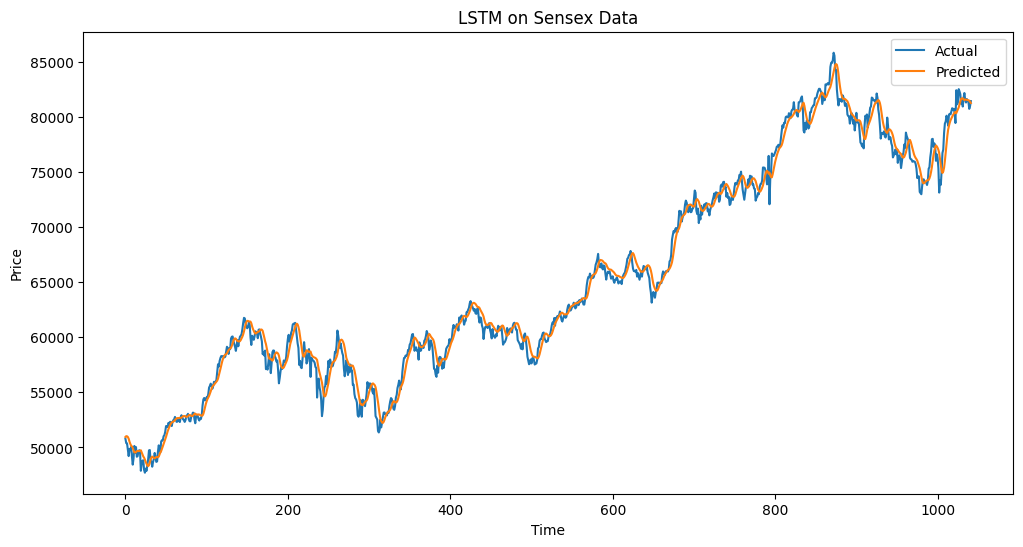

In [37]:
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Step 9: Plot
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('LSTM on Sensex Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

**Got much satisfactory results by using LSTM**

In [40]:
last_sequence = Scaled_data[-60:]

last_sequence = last_sequence.reshape(1, 60, 1)

next_scaled_price = model.predict(last_sequence)

next_price = Scaler.inverse_transform(next_scaled_price)

print("Predicted next day's Sensex closing price:", next_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted next day's Sensex closing price: 81234.055


In [34]:
df.tail()

Price,Close,High,Low,Open,Volume,Daily_return,Volatility,MA_300,MA_200,MA_100,Close_diff
Date,,,,,,,,,,,
2025-05-30,81451.007812,81698.210938,81286.453125,81465.687500,12600,-0.222968,1032.152303,78167.156380,79207.629570,77542.287500,-182.015625
2025-06-02,81373.750000,81474.257812,80654.257812,81214.421875,9900,-0.094852,940.689442,78193.393411,79220.067227,77556.587891,-77.257812
2025-06-03,80737.507812,81774.226562,80575.093750,81492.500000,32000,-0.781876,896.423230,78216.958568,79225.225234,77571.731875,-636.242188
2025-06-04,80998.250000,81087.289062,80705.179688,80777.648438,7500,0.322951,857.322928,78244.413099,79231.971875,77602.064453,260.742188
2025-06-05,81442.039062,81911.132812,80983.726562,81196.078125,9800,0.547900,842.696836,78272.228958,79244.401914,77634.493750,443.789062


In [42]:
from tensorflow.keras.models import load_model
model.save('lstm_model.h5')